# 4. Toy example of classification tree

In [1]:
# graphical engine
%matplotlib inline
import matplotlib
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
matplotlib.pyplot.get_backend()
gui_env = ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 
           'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 
           'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
matplotlib.use('Qt5Agg', force=True)

In [3]:
# import libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [4]:
x1 = np.tile(np.linspace(start = 0.1, stop = 10, num=int(10/0.1), dtype = np.float32), 100)
x2 = np.sort(np.tile(np.linspace(start = 0.1, stop = 10, num=int(10/0.1), dtype = np.float32), 100))

In [5]:
y = np.minimum(1,
               np.maximum(0,
                          (1*(x1+2*x2<8) + 1*(3*x1+x2>30) + np.random.normal(0,0.5,x1.shape[0])).astype(int)))

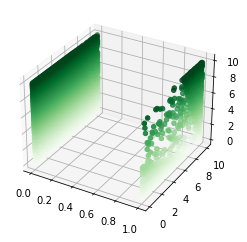

In [6]:
%matplotlib inline
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = x2
xdata = y
ydata = x1
# Data for a three-dimensional line
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

In [7]:
x = pd.DataFrame({'feature_1':x1, 'feature_2':x2})
y = pd.DataFrame({'y':y})

Tree 1

In [8]:
clf_dt = tree.DecisionTreeClassifier(random_state=123,
                                     max_depth = 2).fit(x,y)

In [9]:
col_names_x = x.columns
col_name_y = y.columns

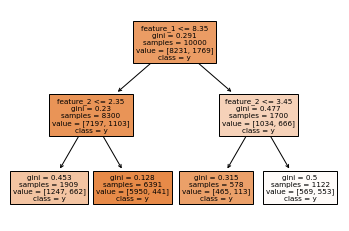

In [10]:
#fig = plt.figure(figsize = (15,15))
_ = tree.plot_tree(clf_dt, 
                   feature_names = col_names_x,  
                   class_names = col_name_y,
                   filled = True)

In [11]:
text_representation = tree.export_text(clf_dt)
print(text_representation)

|--- feature_0 <= 8.35
|   |--- feature_1 <= 2.35
|   |   |--- class: 0
|   |--- feature_1 >  2.35
|   |   |--- class: 0
|--- feature_0 >  8.35
|   |--- feature_1 <= 3.45
|   |   |--- class: 0
|   |--- feature_1 >  3.45
|   |   |--- class: 0



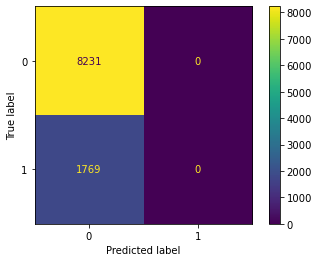

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_dt, x, y, display_labels=['0', '1']);

Tree 2

In [13]:
clf_dt = tree.DecisionTreeClassifier(random_state=123,
                                     max_depth = 20,
                                     min_samples_split = 10,
                                     min_samples_leaf = 5,).fit(x,y)
pred_clf_dt = clf_dt.predict(x)

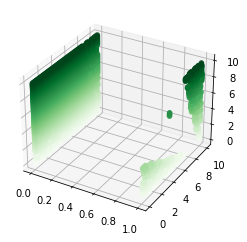

In [14]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = x2
xdata = pred_clf_dt
ydata = x1
# Data for a three-dimensional line
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

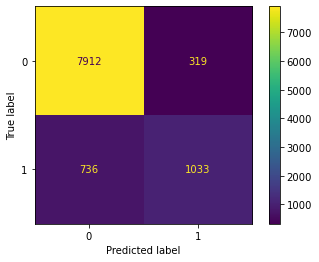

In [15]:
plot_confusion_matrix(clf_dt, x, y, display_labels=['0', '1'])